## Fatal US car accidents 2017-2021

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 6\07-2023 US Accidents analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'FatalCrashes.csv'))

### Data Cleaning & Wrangling

In [3]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'StateYear', 'Weather',
       'Drinking', 'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds',
       'Persons', 'Fatals', 'Crash_fatality_rate'],
      dtype='object')

In [4]:
df['Year'].value_counts(dropna=False)

2021    39508
2020    35935
2017    34560
2018    33919
2019    33487
Name: Year, dtype: int64

In [5]:
# Check for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [6]:
# Simple descriptive analysis
df.describe()

,Year,Hour,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals
count,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000
mean,2019.067144,13.623091,0.302905,0.193665,0.122609,0.387179,0.237694,1.579965,0.229673,2.228884,1.085678
std,1.435006,10.149008,0.459516,0.395171,0.327989,0.487106,0.425672,0.883519,0.475665,1.756138,0.350283
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2019.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,2020.000000,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000
max,2021.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,23.000000,133.000000,20.000000


Some impossible values exist that we need to address.  For example, some values for Hour of the day exceed 24.

In [7]:
df[df['Hour']>24].value_counts(dropna=False).sum()

1336

In [8]:
df[df['Hour']>24]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate
293,2017-10185,2017-03-05,2017,Sunday,99,Alabama,Alabama2017,0,0,0,1,0,1,0,1,1,1
332,2017-10224,2017-04-14,2017,Friday,99,Alabama,Alabama2017,1,0,0,0,0,1,0,1,1,1
634,2017-10527,2017-08-20,2017,Sunday,99,Alabama,Alabama2017,1,0,0,1,1,1,0,1,1,1
731,2017-10624,2017-10-02,2017,Monday,99,Alabama,Alabama2017,0,0,0,0,0,1,1,1,1,1
5254,2017-131330,2017-12-01,2017,Friday,99,Georgia,Georgia2017,1,0,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176447,2021-63990,2021-05-18,2021,Tuesday,99,California,California2021,0,1,1,1,0,1,0,1,1,1
176483,2021-64027,2021-11-20,2021,Saturday,99,California,California2021,1,1,0,0,0,1,0,1,1,1
177405,2021-90301,2021-07-21,2021,Wednesday,99,Connecticut,Connecticut2021,0,0,0,0,0,1,1,0,1,#DIV/0!
177406,2021-90302,2021-05-14,2021,Friday,99,Connecticut,Connecticut2021,0,0,0,0,0,1,1,1,1,1


In [14]:
# Impute median Hour values
median = df.loc[df['Hour']<=24, 'Hour'].median()
df['Hour'] = np.where(df['Hour'] >24, median,df['Hour'])

In [10]:
df[df['Hour']>24]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate


In [11]:
# Check for null values
df.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
StateYear              0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
dtype: int64

In [12]:
# Check for duplicates
df[df.duplicated()]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate


I want to join population data to calculate the crash fatality rates for each state each year.

In [16]:
pop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'State populations.csv'))

In [17]:
pop.columns

Index(['State', 'Year', 'Fatal_tot', 'Fatal_crash_tot', 'State_pop'], dtype='object')

In [18]:
# Check for mixed data types
for col in pop.columns.tolist():
  weird = (pop[[col]].applymap(type) != pop[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (pop[weird]) > 0:
    print (col)

In [19]:
# Descriptive analysis
pop.describe()

,Year,Fatal_tot,Fatal_crash_tot,State_pop
count,255.000000,255.000000,255.000000,2.550000e+02
mean,2019.000000,755.329412,695.721569,6.444924e+06
std,1.416995,846.005753,777.776579,7.297987e+06
min,2017.000000,23.000000,22.000000,5.776010e+05
25%,2018.000000,231.500000,211.000000,1.789242e+06
50%,2019.000000,558.000000,522.000000,4.467673e+06
75%,2020.000000,981.000000,907.500000,7.473616e+06
max,2021.000000,4498.000000,4068.000000,3.951222e+07


No unusual values.

In [21]:
# Check for null values
pop.isnull().sum()

State              0
Year               0
Fatal_tot          0
Fatal_crash_tot    0
State_pop          0
dtype: int64

In [20]:
# Check for duplicates
pop[pop.duplicated()]

,State,Year,Fatal_tot,Fatal_crash_tot,State_pop


In [22]:
# Join dataframes
dt = pd.merge(df,pop)

In [23]:
dt.head()

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop
0,2017-100001,2017-01-04,2017,Wednesday,8.0,Delaware,Delaware2017,1,0,0,0,0,1,1,1,1,1,119,112,956823
1,2017-100002,2017-02-05,2017,Sunday,0.0,Delaware,Delaware2017,0,1,0,0,0,1,0,1,1,1,119,112,956823
2,2017-100003,2017-01-23,2017,Monday,14.0,Delaware,Delaware2017,1,0,0,0,1,2,0,2,1,0.5,119,112,956823
3,2017-100004,2017-01-30,2017,Monday,6.0,Delaware,Delaware2017,1,0,0,0,0,1,1,1,1,1,119,112,956823
4,2017-100005,2017-02-04,2017,Saturday,0.0,Delaware,Delaware2017,0,1,1,1,0,1,0,1,1,1,119,112,956823


In [24]:
dt.shape

(177409, 20)

In [25]:
dt.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
StateYear              0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
Fatal_tot              0
Fatal_crash_tot        0
State_pop              0
dtype: int64

In [26]:
dt[dt.duplicated()]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop


In [27]:
dt.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'StateYear', 'Weather',
       'Drinking', 'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds',
       'Persons', 'Fatals', 'Crash_fatality_rate', 'Fatal_tot',
       'Fatal_crash_tot', 'State_pop'],
      dtype='object')

In [28]:
# Drop unnecessary columns
dt = dt.drop(columns=['StateYear'])

In [30]:
dt[dt['State']=='Alabama']['State_pop'].value_counts(dropna=False)

5049846    885
4887681    876
4874486    864
4903185    856
5031362    852
Name: State_pop, dtype: int64

In [31]:
# Export clean dataset to use moving forward
dt.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_crashes.csv'))

## EDA

In [2]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 6\07-2023 US Accidents analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean_crashes.csv'))

In [3]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop'],
      dtype='object')

### Heatmap

In [3]:
df.dtypes

ID                      object
Date                    object
Year                     int64
Day                     object
Hour                     int64
State                   object
Weather                  int64
Drinking                 int64
Drugs                    int64
No_Seatbelt              int64
Pickup                   int64
Veh_Tot                  int64
Peds                     int64
Persons                  int64
Fatals                   int64
Crash_fatality_rate    float64
Fatal_tot                int64
Fatal_crash_tot          int64
State_pop                int64
dtype: object

In [4]:
df.describe()

,Year,Hour,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop
count,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,1.774090e+05
mean,2019.067144,12.982988,0.302905,0.193665,0.122609,0.387179,0.237694,1.579965,0.229673,2.228884,1.085678,0.578900,1697.257101,1561.821074,1.398634e+07
std,1.435006,6.906596,0.459516,0.395171,0.327989,0.487106,0.425672,0.883519,0.475665,1.756138,0.350283,0.286834,1356.281526,1243.079178,1.168808e+07
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.016393,23.000000,22.000000,5.776010e+05
25%,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.333333,693.000000,638.000000,5.131848e+06
50%,2019.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.500000,1059.000000,973.000000,9.986857e+06
75%,2020.000000,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,3185.000000,2952.000000,2.147774e+07
max,2021.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,23.000000,133.000000,20.000000,1.000000,4498.000000,4068.000000,3.951222e+07


In [5]:
sub_heat = df[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

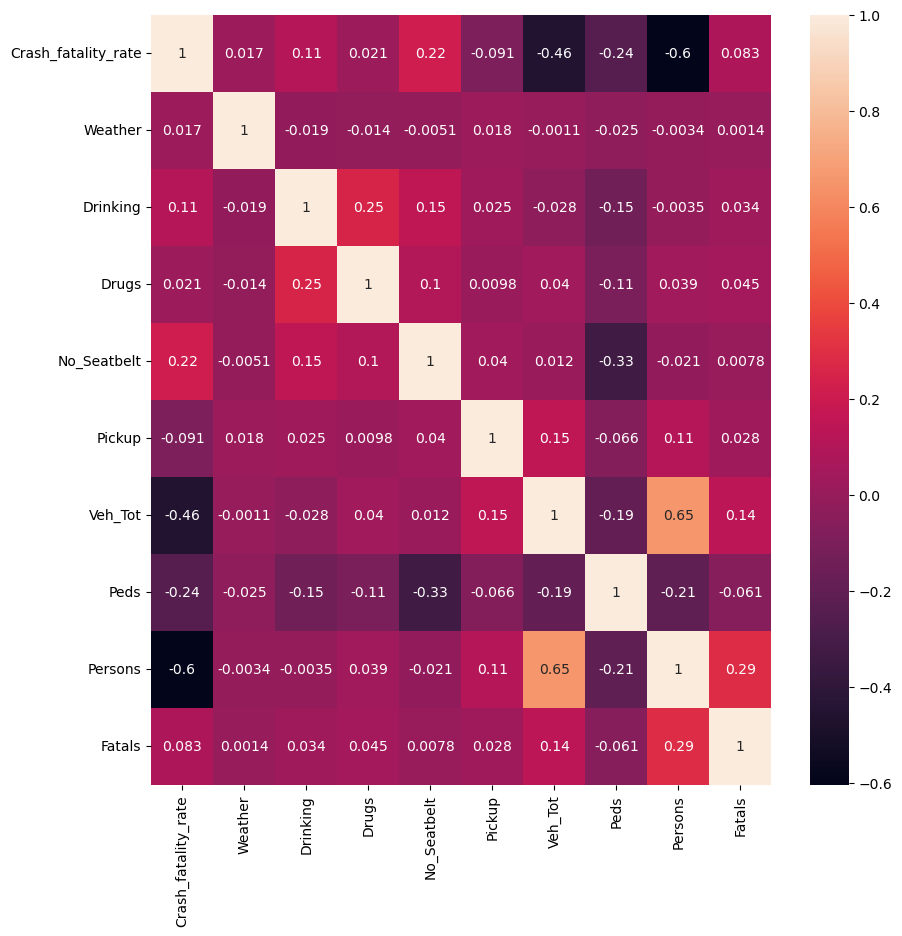

In [6]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub_heat.corr(), annot = True, ax = ax)

In [7]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

In [8]:
small_sub = small[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

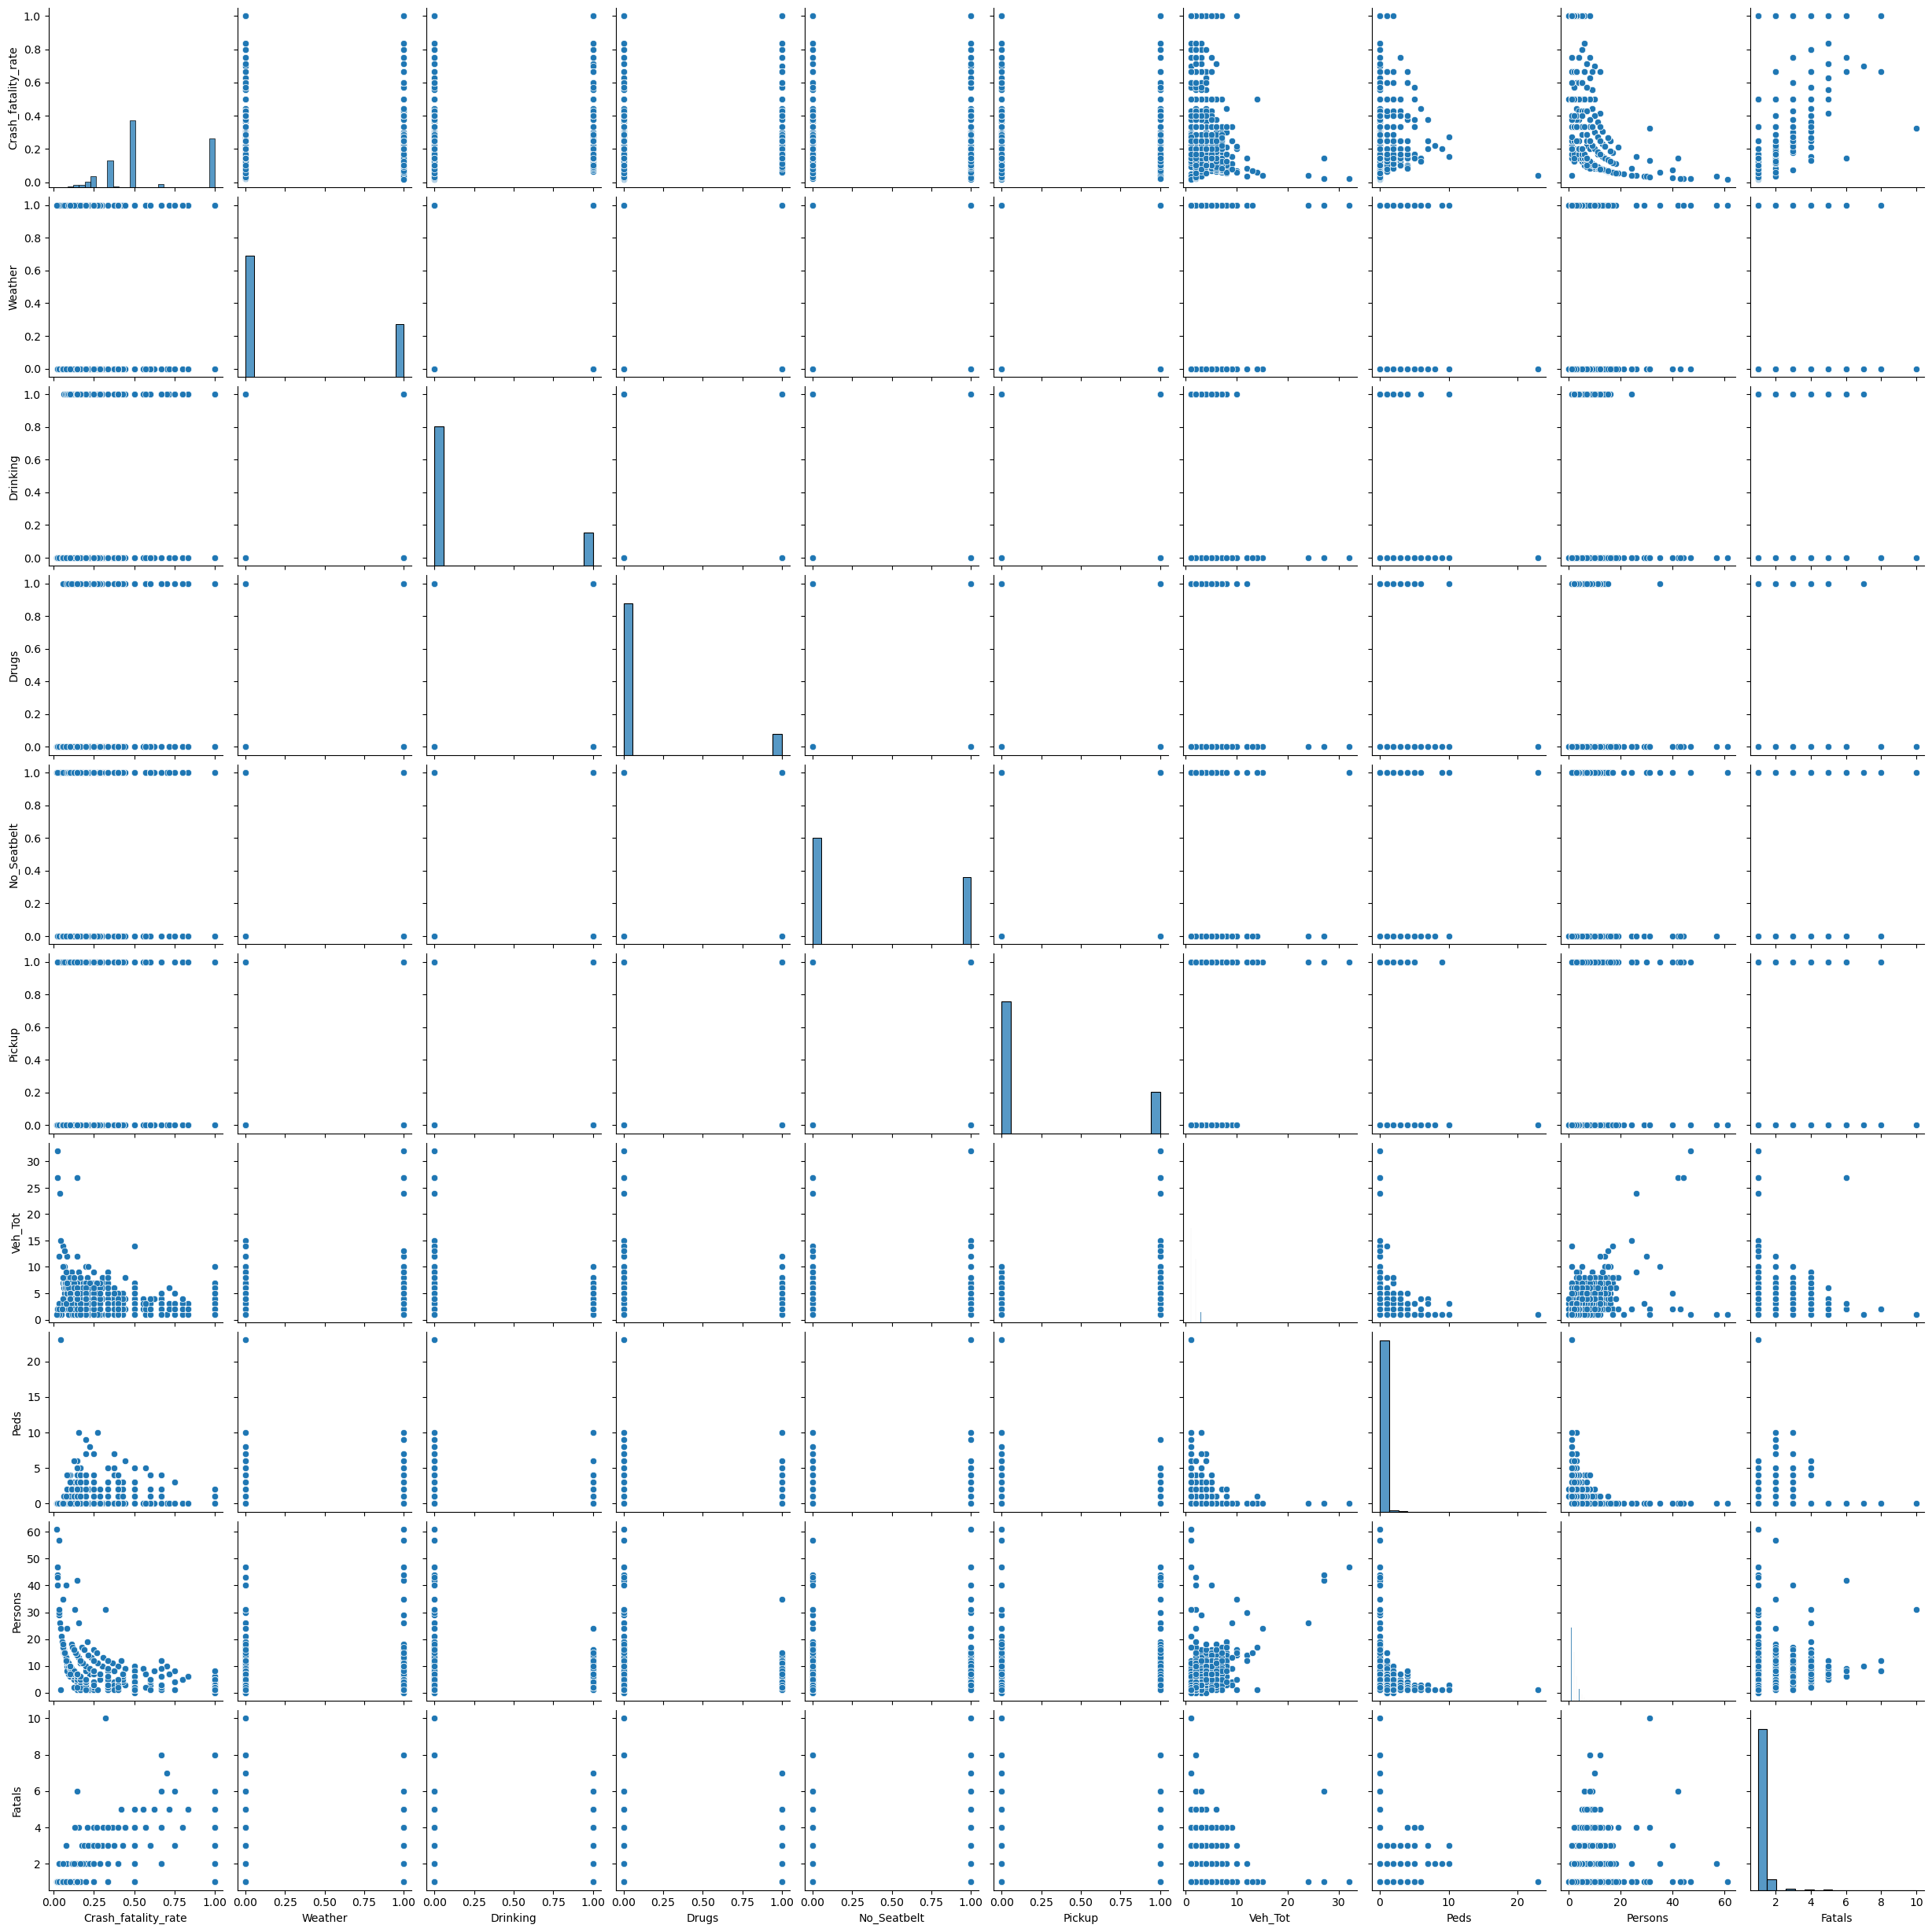

In [9]:
sns.pairplot(small_sub)

Text(0.5, 1.0, 'Vehicle Total vs Fatalities')

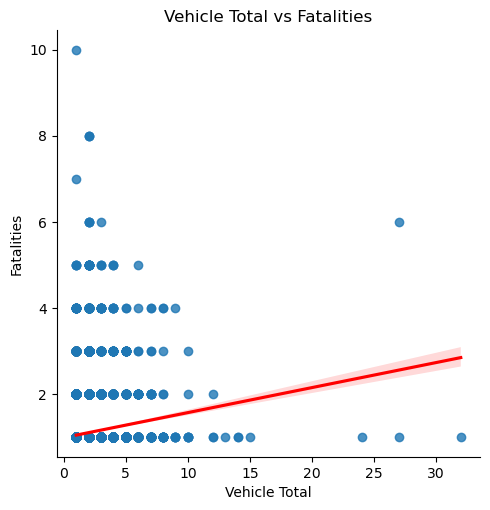

In [12]:
sns.lmplot(x = 'Veh_Tot', y = 'Fatals', data = small, line_kws={'color': 'red'})
plt.xlabel('Vehicle Total')
plt.ylabel('Fatalities')
plt.title('Vehicle Total vs Fatalities')

There is a positive relationship between total number of vehicles involved in a crash and fatalities.  This makes sense because more vehicles involved means more total people that could potentially be killed in the crash.

Text(0.5, 1.0, 'Total People Involved vs Fatalities')

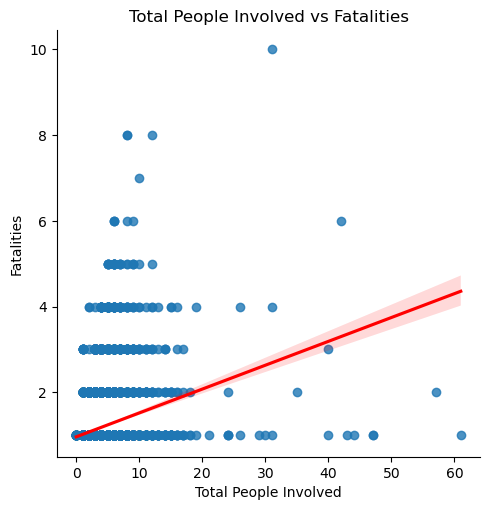

In [13]:
sns.lmplot(x = 'Persons', y = 'Fatals', data = small, line_kws={'color': 'red'})
plt.xlabel('Total People Involved')
plt.ylabel('Fatalities')
plt.title('Total People Involved vs Fatalities')

Text(0.5, 1.0, 'No Seatbelt vs Crash Fatality Rate')

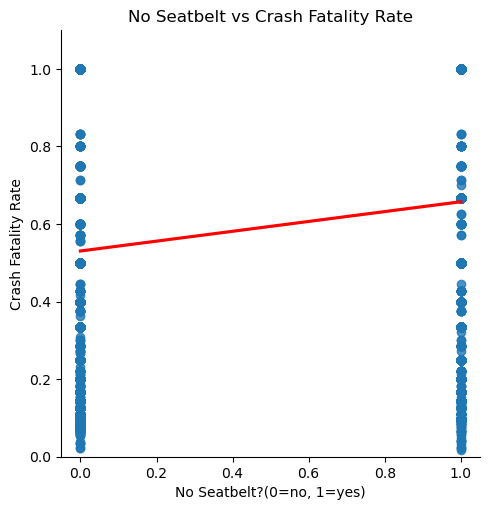

In [20]:
sns.lmplot(x = 'No_Seatbelt', y = 'Crash_fatality_rate', data = small, line_kws={'color': 'red'})
plt.ylim(0, 1.1)
plt.xlabel('No Seatbelt?(0=no, 1=yes)')
plt.ylabel('Crash Fatality Rate')
plt.title('No Seatbelt vs Crash Fatality Rate')

When drivers don't wear seatbelts, the crash fatality rate is higher.

Text(0.5, 1.0, 'Drinking driver vs Crash Fatality Rate')

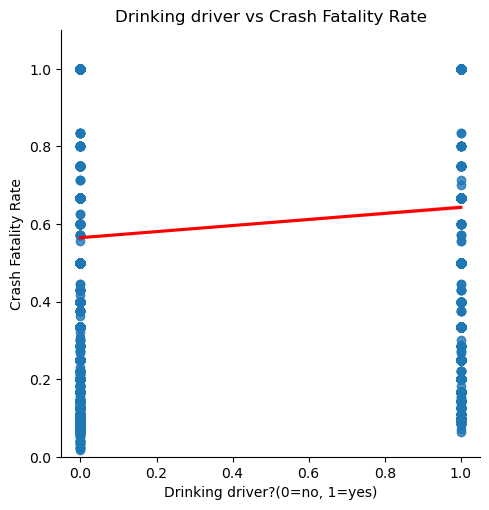

In [14]:
sns.lmplot(x = 'Drinking', y = 'Crash_fatality_rate', data = small, line_kws={'color': 'red'})
plt.ylim(0, 1.1)
plt.xlabel('Drinking driver?(0=no, 1=yes)')
plt.ylabel('Crash Fatality Rate')
plt.title('Drinking driver vs Crash Fatality Rate')

When drivers drink, regardless of the Blood Alcohol Level, there is an increase in crash fatality rate.

Text(0.5, 1.0, 'Pedestrians vs Crash Fatality Rate')

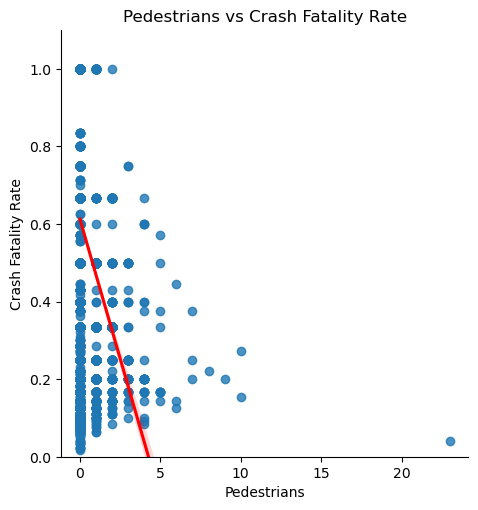

In [15]:
sns.lmplot(x = 'Peds', y = 'Crash_fatality_rate', data = small, line_kws={'color': 'red'})
plt.ylim(0, 1.1)
plt.xlabel('Pedestrians')
plt.ylabel('Crash Fatality Rate')
plt.title('Pedestrians vs Crash Fatality Rate')

Most fatal crashes don't involve any pedestrians, which explains the overall negative trend.

Text(0.5, 1.0, 'US Crash Fatality Rates (% of people involved who died)')

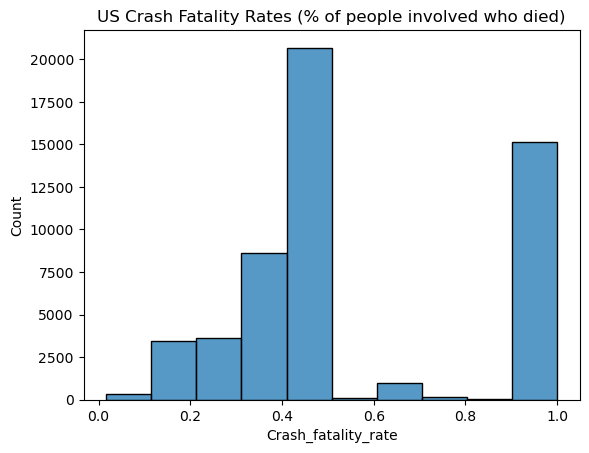

In [18]:
sns.histplot(small['Crash_fatality_rate'], bins = 10)
plt.title('US Crash Fatality Rates (% of people involved who died)')

Most crashes involve half of the people involved dying.  Interestingly, the second-highest category involves everyone in the crash dying.

## OLS Regression Model

Running a regression model and obtaining coefficients will let me know whether the factors identified in the analysis significantly affect the crash fatality rate.  I will only include factors that are not directly correlated with the crash fatality rate since it was calculated using the total number of people involved in the crash.  For this reason, I will need to exclude Veh_Tot, Persons, Peds, and Fatals.

In [19]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop'],
      dtype='object')

In [20]:
from statsmodels.formula.api import ols
fit = ols('Crash_fatality_rate ~ C(Weather) + C(Drinking) + C(Drugs) + C(No_Seatbelt) + C(Pickup)', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Crash_fatality_rate   R-squared:                       0.063
Model:                             OLS   Adj. R-squared:                  0.063
Method:                  Least Squares   F-statistic:                     2404.
Date:                 Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                         20:40:39   Log-Likelihood:                -24360.
No. Observations:               177409   AIC:                         4.873e+04
Df Residuals:                   177403   BIC:                         4.879e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5338      0.001    509.703      0.000       0.532       0.536
C(Weather)[T.1]         0.0133      0.001      9.266      0.000       0.010       0.016
C(Drinking)[T.1]        0.0617      0.002     35.533      0.000       0.058       0.065
C(Drugs)[T.1]          -0.0183      0.002     -8.801      0.000      -0.022      -0.014
C(No_Seatbelt)[T.1]     0.1231      0.001     89.674      0.000       0.120       0.126
C(Pickup)[T.1]         -0.0685      0.002    -44.180      0.000      -0.072      -0.065
==============================================================================
Omnibus:                    43337.356   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11812.674
Skew:                           0.392   Prob(JB):                         0.00
Kurtosis:                       2.008   Cond. No.                         3.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the included variables have a significant effect on crash fatality rates.  The results can be interpreted as follows:
-  Weather increases fatality rate CFR by 1.3%
-  Drinking drivers increase fatality rate by 6.2%
-  Drivers using drugs actually decreases fatality rate by 1.8%
-  Drivers not wearing seatbelts increases fatality rate by 12.3%
-  The involvement of pickup trucks decreases fatality rate by 6.9%

Some of these results are quite surprising.  I expected drugs and pickup trucks to increase fatality rate but they actually have the opposite effect on average.

## K-Means Clustering

Clustering crashes into like groups can help interpret visuals in the analysis.

In [44]:
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline

In [45]:
# Subset only numeric values
dfnum = df[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

In [46]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [47]:
score = [kmeans[i].fit(dfnum).score(dfnum) for i in range(len(kmeans))]
score

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\clust

[-920608.5671335561,
 -587789.8536768084,
 -475407.2034472169,
 -415974.7589942435,
 -371783.7843816981,
 -341800.05480069347,
 -317017.1492164105,
 -291211.6105649888,
 -277872.3327665303]

Text(0.5, 1.0, 'Elbow Curve')

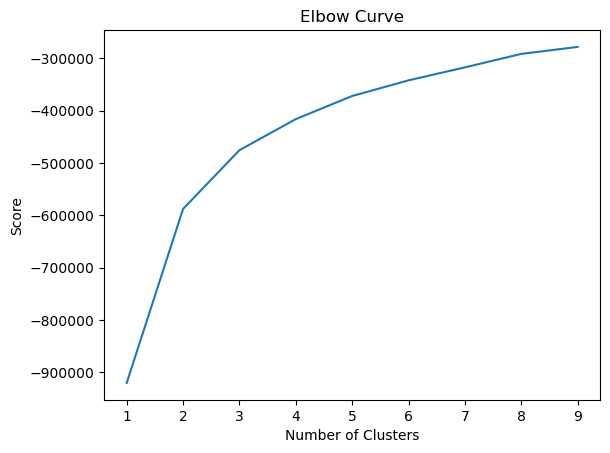

In [48]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

The elbow occurs at 3 clusters.

In [49]:
kmeans = KMeans(n_clusters = 3) 

In [50]:
kmeans.fit(dfnum)

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [51]:
dfnum['clusters'] = kmeans.fit_predict(dfnum)

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\AppData\Local\Temp\ipykernel_20664\754461545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum['clusters'] = kmeans.fit_predict(dfnum)


In [52]:
dfnum['clusters'].value_counts()

0    91156
1    71474
2    14779
Name: clusters, dtype: int64

In [53]:
# Take sample to improve readability of graph
np.random.seed(4)
dev = np.random.rand(len(dfnum)) <= 0.7
big = dfnum[dev]
small = dfnum[~dev]

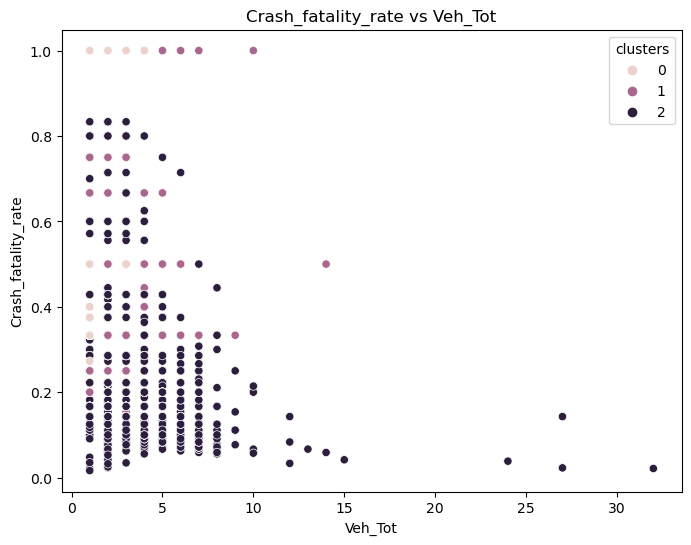

In [54]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Veh_Tot'], y=small['Crash_fatality_rate'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Veh_Tot')
plt.ylabel('Crash_fatality_rate')
plt.title('Crash_fatality_rate vs Veh_Tot')
plt.show()

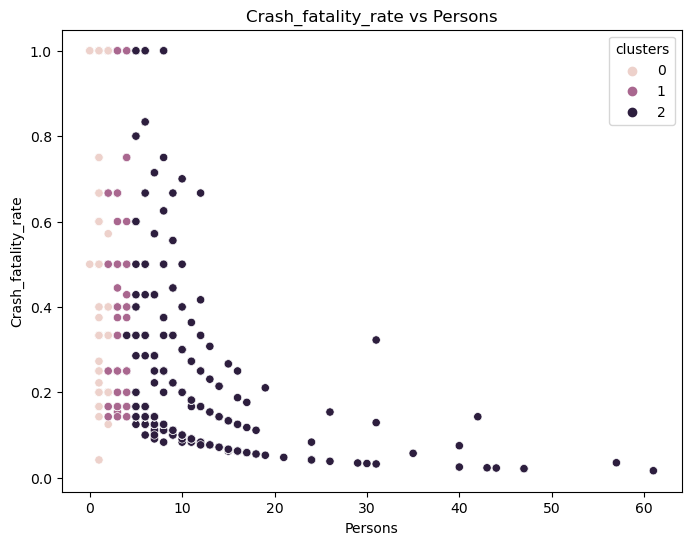

In [32]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Persons'], y=small['Crash_fatality_rate'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Persons')
plt.ylabel('Crash_fatality_rate')
plt.title('Crash_fatality_rate vs Persons')
plt.show()

Persons seems to be the main variable that decided the clusters.

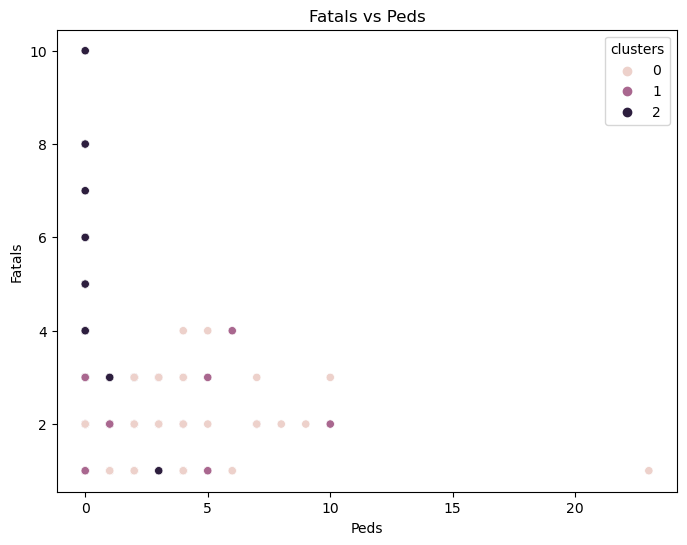

In [55]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Peds'], y=small['Fatals'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Peds')
plt.ylabel('Fatals')
plt.title('Fatals vs Peds')
plt.show()

In [11]:
df.loc[dfnum['clusters'] == 2, 'cluster'] = '2'
df.loc[dfnum['clusters'] == 1, 'cluster'] = '1'
df.loc[dfnum['clusters'] == 0, 'cluster'] = '0'

In [12]:
df.groupby('cluster').agg({'Persons':['mean', 'median'], 'Veh_Tot':['mean', 'median'], 'Crash_fatality_rate':['mean', 'median'], 'No_Seatbelt':['mean', 'median'],'Peds':['mean', 'median']})

Persons          Veh_Tot        Crash_fatality_rate         \
             mean median      mean median                mean median   
cluster                                                                
0        2.708230    3.0  2.042043    2.0            0.425958    0.5   
1        6.373638    6.0  2.726436    2.0            0.222099    0.2   
2        1.181052    1.0  1.031781    1.0            0.756668    1.0   

        No_Seatbelt             Peds         
               mean median      mean median  
cluster                                      
0          0.415340    0.0  0.074657    0.0  
1          0.341160    0.0  0.068137    0.0  
2          0.372559    0.0  0.377408    0.0

## Time Series Analysis

I'm interested to see how total fatality numbers change over time.

In [50]:
import statsmodels.api as sm

In [51]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster'],
      dtype='object')

In [97]:
# Subset
dfsub = df[['Date','Fatals']]

In [98]:
dfsub = dfsub.reset_index()
dfsub.drop(['index'], axis=1, inplace=True)
dfsub.head()

,Date,Fatals
0,1/4/2017,1
1,2/5/2017,1
2,1/23/2017,1
3,1/30/2017,1
4,2/4/2017,1


In [99]:
dfsub = dfsub.groupby(pd.PeriodIndex(dfsub['Date'], freq="M"))['Fatals'].sum()

In [100]:
dfsub = dfsub.reset_index()
dfsub.head()

,Date,Fatals
0,2017-01,2845
1,2017-02,2528
2,2017-03,2928
3,2017-04,2993
4,2017-05,3188


In [101]:
from datetime import datetime
dfsub['Date'] = dfsub['Date'].dt.strftime('%Y-%m')
dfsub.head()

,Date,Fatals
0,2017-01,2845
1,2017-02,2528
2,2017-03,2928
3,2017-04,2993
4,2017-05,3188


In [102]:
dfsub = dfsub.set_index('Date')
dfsub.sort_index(inplace=True)
dfsub.head()

,Fatals
Date,
2017-01,2845
2017-02,2528
2017-03,2928
2017-04,2993
2017-05,3188


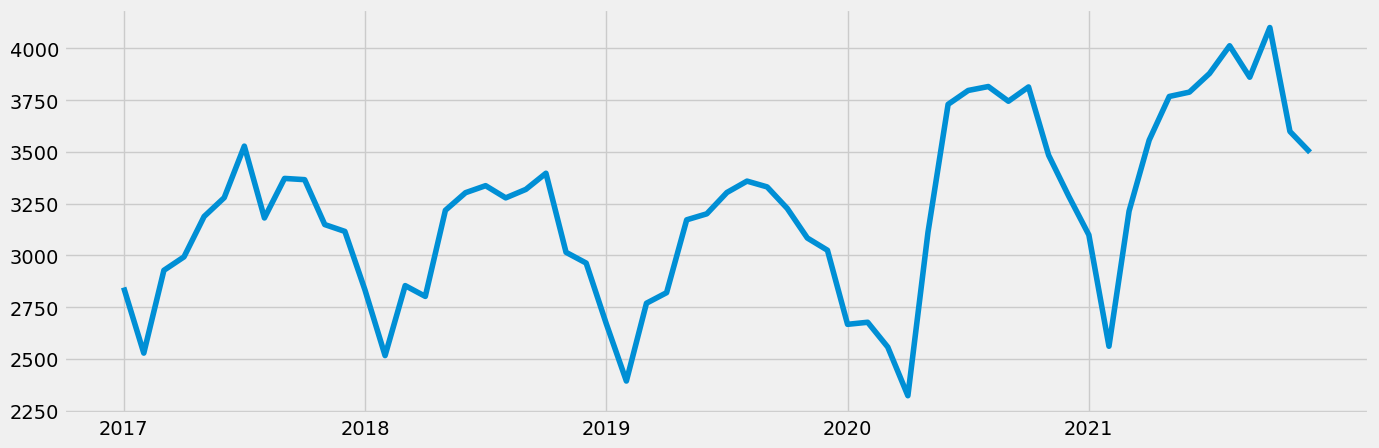

In [103]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dfsub)
ax.set_xticks(dfsub.index[::12])
ax.set_xticklabels(dfsub.index[::12].str[:4])
plt.show()

### Time Series Analysis Decomposition

In [113]:
decomposition = sm.tsa.seasonal_decompose(dfsub, model='additive',period=5)

In [114]:
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
dfdecomp = pd.DataFrame({"observed":observed, "trend":trend, "seasonal":seasonal,"residual":residual})

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

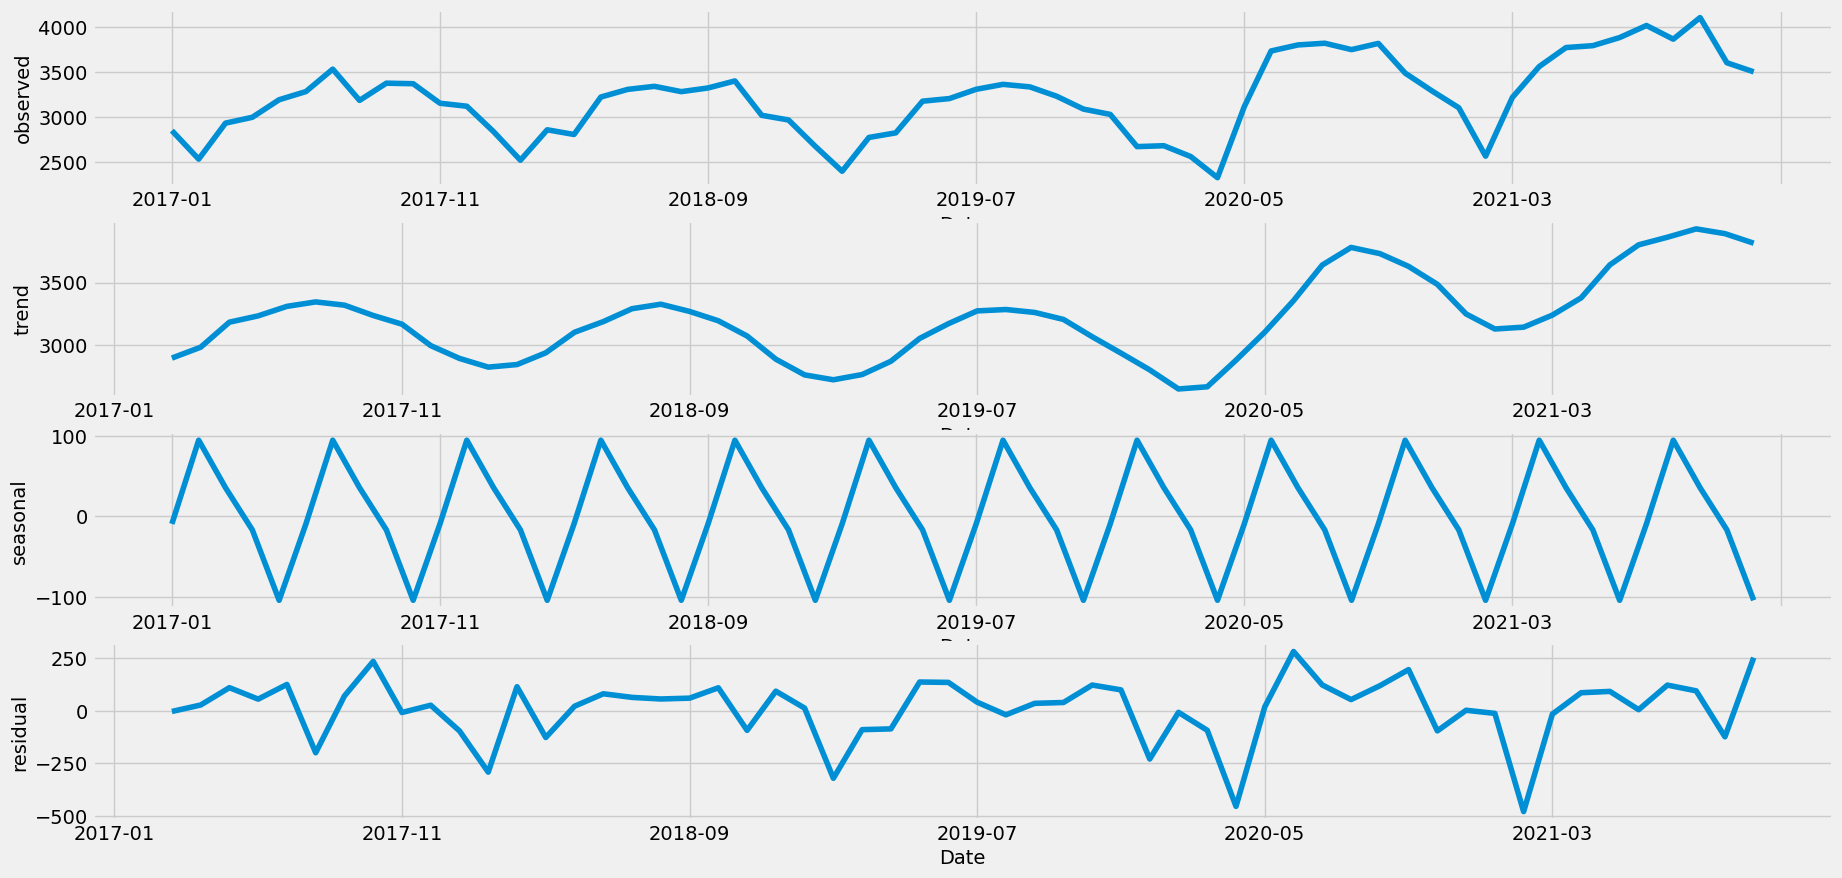

In [116]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

_, axes = plt.subplots(nrows=4,ncols=1, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax = dfdecomp.iloc[:,i].plot(ax=ax)
    ax.set_ylabel(dfdecomp.iloc[:,i].name)

In [117]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(dfsub['Fatals'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.877709
p-value                         0.992792
Number of Lags Used             9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


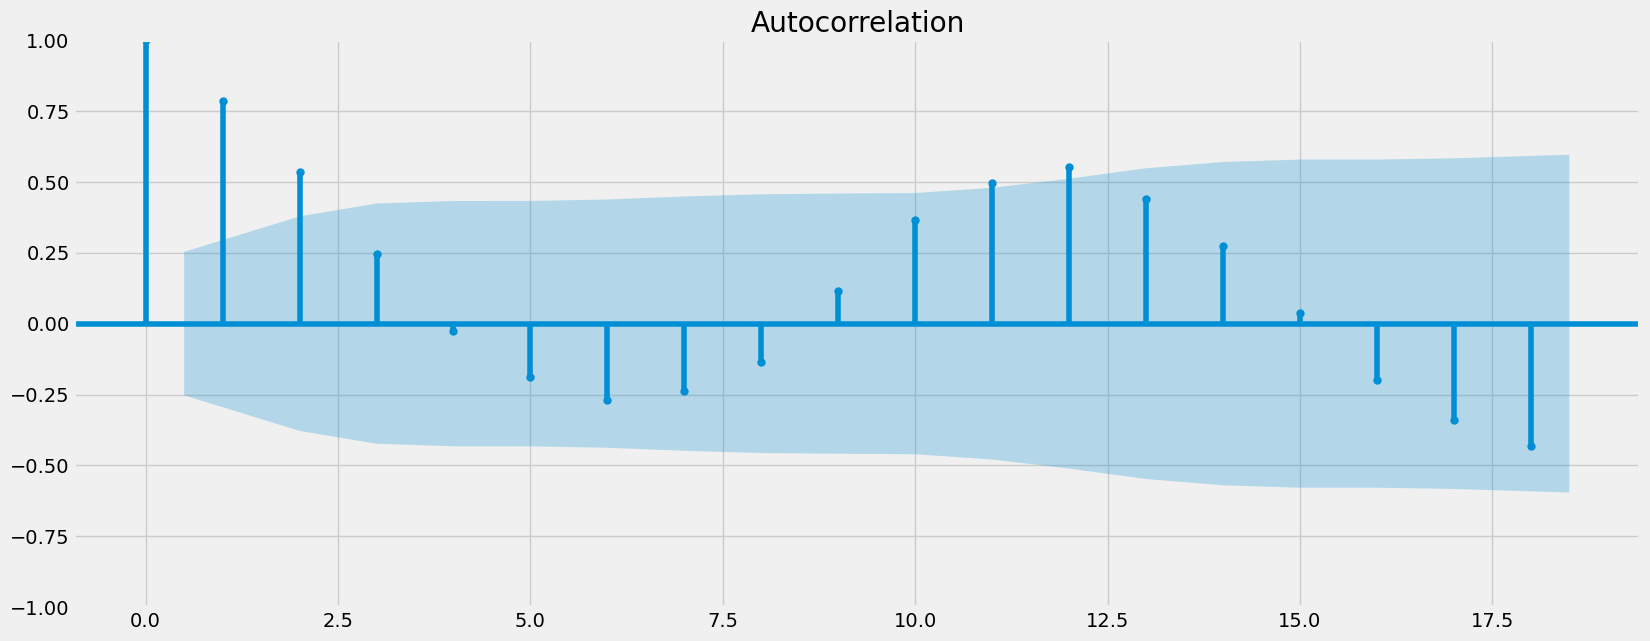

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dfsub)
plt.show()

According to the test, the dataset is not significantly autocorrelated.

### Final cleanup before exporting dataset

In [119]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster'],
      dtype='object')

In [13]:
df.loc[df['cluster'] == '2', 'Occupants_involved'] = 'Low'
df.loc[df['cluster'] == '1', 'Occupants_involved'] = 'High'
df.loc[df['cluster'] == '0', 'Occupants_involved'] = 'Medium'

In [14]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster', 'Occupants_involved'],
      dtype='object')

In [16]:
df = df.drop(columns=['cluster'])

In [17]:
df.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
Fatal_tot              0
Fatal_crash_tot        0
State_pop              0
Occupants_involved     0
dtype: int64

In [18]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_crashes_final.csv'))